In [108]:
import numpy as np
import glob
import matplotlib.pyplot as plt 
from PIL import Image

'''
helper functions to display images
'''


def show_image(img): 
    shape = img.shape
    if len(shape) == 3: 
        num_channels = shape[-1]
        assert num_channels==3, "RGB image must have 3 channels."
    elif len(shape) == 2: 
        num_channels = 1
    
    fig = plt.figure()
    if num_channels == 3: 
        plt.imshow(img.astype(np.uint8), vmin=0., vmax=255.)
    else: 
        plt.imshow(img.astype(np.uint8), vmin=0., vmax=255., cmap='gray')

    plt.show()
    plt.close()

def show_filter(f): 
    fig = plt.figure()
    plt.imshow(f, cmap='gray')
    plt.show()
    plt.close()

def show_channels(img): 
    num_channels = 3
    titles = ['red', 'green', 'blue']
    fig = plt.figure()
    
    for i in range(num_channels): 
        plt.subplot(1, num_channels, i+1)
        plt.imshow(img.astype(np.uint8)[:, :, i], vmin=0., vmax=255., cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()
    plt.close()
    


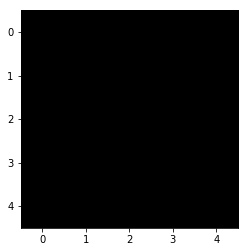

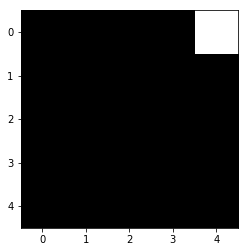

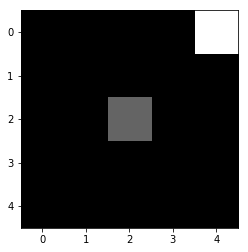

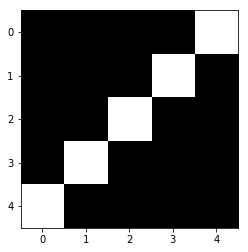

In [75]:
'''
manipulating arrays
'''
h=5
w=5
canvas = np.zeros([h, w])
show_image(canvas)

# draw a white pixel in the upper left hand corner
canvas[0, 4] = 255
show_image(canvas)

# draw a grey pixel in the middle
canvas[2, 2] = 100
show_image(canvas)

# make all the diagonal pixels (from upper right to lower left) white 
for i in range(h): 
    canvas[i, h-i-1] = 255
show_image(canvas)


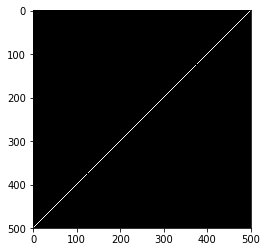

In [79]:
'''
draw the same diagonal line, but for a large canvas
'''
h = 500
w = 500
canvas = np.zeros([h, w])
for i in range(h): 
    canvas[i, h-i-1] = 255
show_image(canvas)



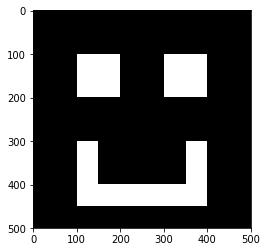

In [88]:
'''
draw a smiley face
'''
h = 500
w = 500
canvas = np.zeros([h, w])


# left eye
canvas[100:200, 100:200] = 255

# right eye
canvas[100:200, 300:400] = 255

# smiley face
canvas[300:400, 100:150] = 255
canvas[300:400, 350:400] = 255
canvas[400:450, 100:400] = 255

show_image(canvas)



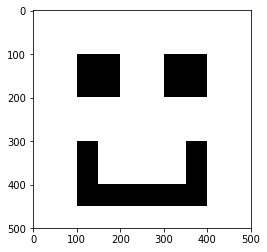

In [89]:
'''
invert the smiley face
'''
h = 500
w = 500
canvas = np.zeros([h, w])
canvas[:, :] = 255


# left eye
canvas[100:200, 100:200] = 0

# right eye
canvas[100:200, 300:400] = 0

# smiley face
canvas[300:400, 100:150] = 0
canvas[300:400, 350:400] = 0
canvas[400:450, 100:400] = 0

show_image(canvas)



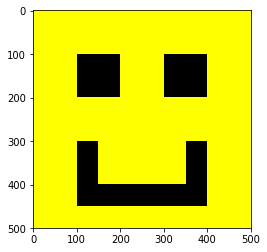

In [91]:
'''
make it a yellow smileyface
'''

canvas_rgb = np.zeros([h, w, 3])
canvas_rgb[:, :, 0] = canvas
canvas_rgb[:, :, 1] = canvas
show_image(canvas_rgb)



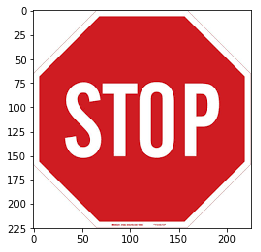

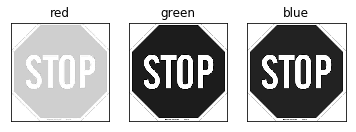

In [111]:
'''
load real image
visualize real image
'''
im_path = './notebook1_images/stopsign.png'
im = Image.open(im_path).convert('RGB')
im_arr = np.array(im)
height, width, num_channels = im_arr.shape

show_image(im_arr)

'''
visualize each channel 
'''
show_channels(im_arr)


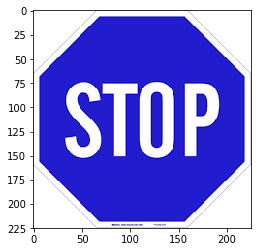

In [33]:
'''
turn the image blue
'''

swapped_im_arr = np.zeros([height, width, num_channels])
swapped_im_arr[:, :, 0] = im_arr[:, :, 2]
swapped_im_arr[:, :, 1] = im_arr[:, :, 1]
swapped_im_arr[:, :, 2] = im_arr[:, :, 0]
show_image(swapped_im_arr)


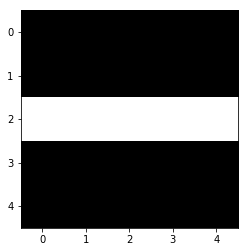

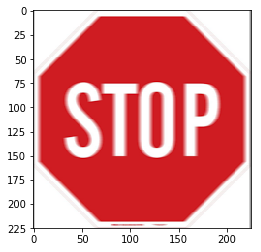

In [120]:
'''
horizontal blur filter
'''

def pad_image(im_arr, filter_height, filter_width): 
    
    buffer_height = (filter_height - 1) / 2
    buffer_width = (filter_width - 1) / 2

    im_height, im_width, num_channels = im_arr.shape
    image = np.zeros([im_height + buffer_height * 2, im_width + buffer_width * 2, num_channels])
    image[buffer_height:-buffer_height, buffer_width:-buffer_width] = im_arr
    
    return image

def convolve_image(f, im_arr): 
    im_height, im_width, num_channel = im_arr.shape
    filter_height, filter_width = f.shape
    image = pad_image(im_arr, filter_height, filter_width)
    
    convolution = np.zeros([im_height, im_width, num_channels])
    
    for i in range(im_height): 
        for j in range(im_width): 
            for k in range(num_channel): 
                window = image[i:(i+filter_height), j:(j+filter_width), k] 
                convolution[i, j, k] = np.sum(np.multiply(window, f))
                
    return convolution
    
    

filter_height = 5
filter_width = 5
f = np.zeros([filter_height, filter_width])
f[2, :] = 1. 
f = f / filter_height 
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)



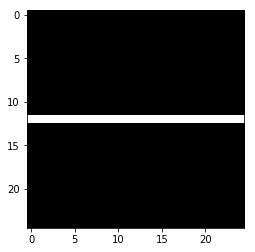

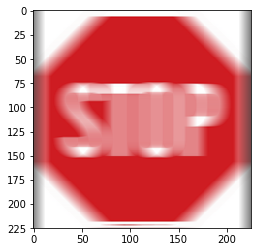

In [122]:
'''
more horizontal blurring
'''
filter_height = 25
filter_width = 25
f = np.zeros([filter_height, filter_width])
f[12, :] = 1. 
f = f / filter_height
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)

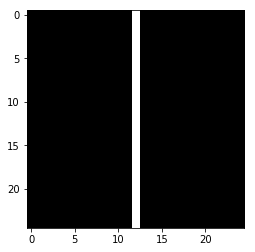

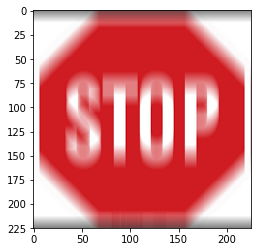

In [123]:
'''
vertical blurring
'''
filter_height = 25
filter_width = 25
f = np.zeros([filter_height, filter_width])
f[:, 12] = 1. 
f = f / filter_height
show_filter(f)

convolution = convolve_image(f, im_arr)
show_image(convolution)

In [ ]:
'''
try a filter of your own
'''
filter_height = 25
filter_width = 25
f = np.zeros([filter_height, filter_width])
f[12, :] = 1. 
f = f / filter_height
show_filter(f)

(145, 960, 1280, 3)


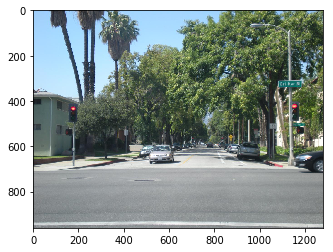

In [107]:
dataset_path = './notebook1_images/tf_dataset/'  
image_list = []
for filename in glob.glob(dataset_path + '*.jpg'):
    im=Image.open(filename).convert('RGB')
    image_list.append(np.array(im).astype(np.uint8))

example_image = image_list[0]
num_images = len(image_list)
height, width, num_channels = example_image.shape
print(num_images, height, width, num_channels)
show_image(example_image)

In [ ]:
'''
stuff about thresholding, precision and recall
'''